In [182]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import imshow,show
from scipy import integrate as int
from gaussxw import gaussxw, gaussxwab
from scipy.special import factorial
import cmath

# **<center>Computational Physics Problem Set #3</center>**
### <center>Cameron Foltz</center>

### Exercise 5.3: Gaussian Error Function

take the integral:
$$E(x) = \int_{0}^{x}e^{-t^2}dt$$

Solve for E(x) from 0 to 3 in steps of 0.1 using trapezoidal rule, then plot E(x) as a function of x.

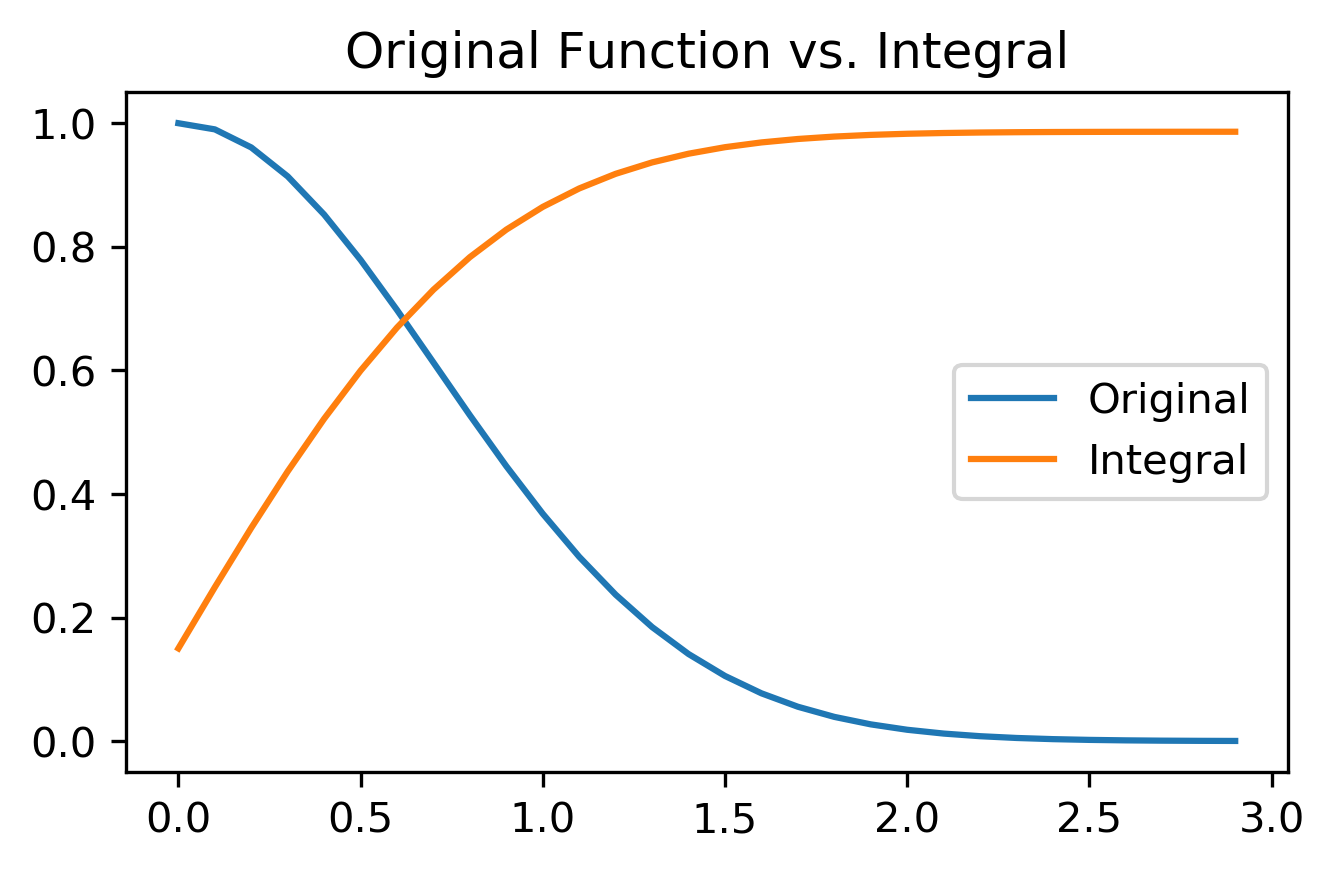

In [183]:
def f(x):
    return np.exp(-x**2)

def integral(f, step, a, b):
    """Calculates the integral using the trapezoidal rule.  Inputs number of slices N, starting point a and ending point b.  N,a,b must be integers.  Returns float value for integral and an array of floats that represents the total distance traveled at each step."""
    x = np.arange(a,b,step)
    h = (b-a)/len(x)
    I = h*(0.5*f(a)+0.5*f(b))
    val = []
    #run through time values and append array
    for i in x:
        I += h*f(i)
        #Keeps track of integral value at each step
        val.append(I)
    return I, val

answer = integral(f,0.1,0,3)
value = answer[0]
array = answer[1]
x = np.arange(0,3,0.1)

# Plot Results
plt.figure(1, [5,3], dpi=300)
plt.title("Original Function vs. Integral")
plt.plot(x, f(x), label="Original")
plt.plot(x, array, label="Integral")
plt.legend()
plt.show()


### Exercise 5.4: Diffraction Limit of a Telescope

a) Write a script that calculates the value of the bessel functions $J_m(x)$ with m = 0,1,2 from x = 0 to x = 20.  Use simpson's rule with N = 1000

$$J_m(x) = \frac{1}{\pi}\int_{0}^{\pi}cos(m\theta-xsin\theta)d\theta$$

b) Make a density plot of the intensity of circular diffraction pattern with $\lambda = 500 nm$ use r from 0 to 1$\mu$m. The intensity is given by the equation below.

$$I(r) = \left(\frac{J_1(kr)}{kr}\right)^2$$

where $k = 2\pi/\lambda$

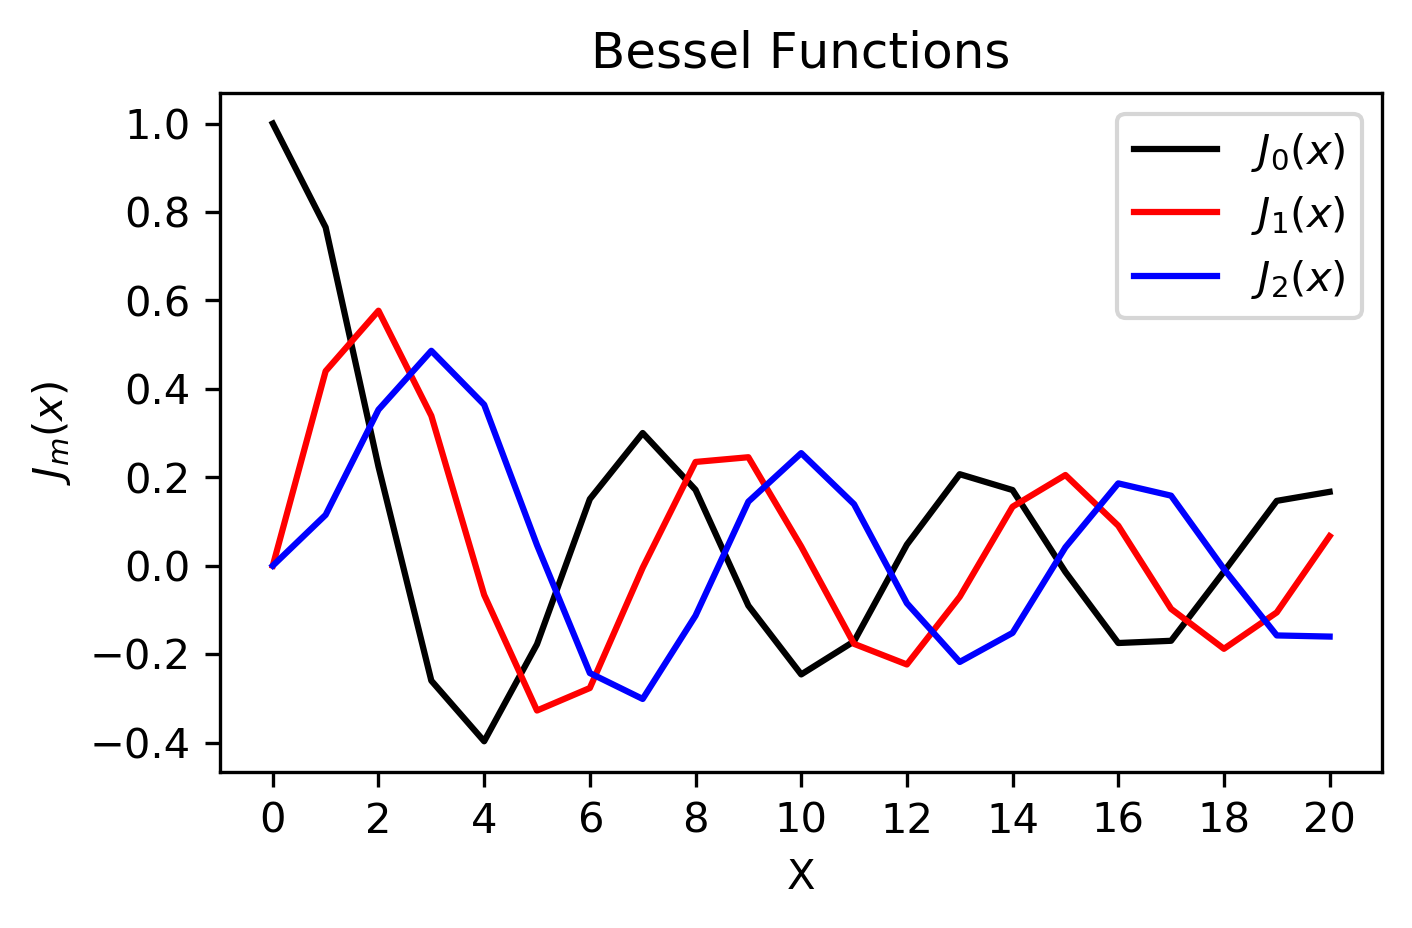

In [184]:
def J(m, x):
    "Returns bessel function using simpsons rule with N=1000 from 0 to pi. Takes in the order of the bessel function m, and the x-value x.  "
    #Define Bessel function
    def f(theta):
        """takes an input x and outputs the results of the bessel function"""
        return np.cos(m*theta - x*np.sin(theta))
    # Define constants
    a = 0.
    b = np.pi
    h = (b-a)/1000
    s1 = 0
    s2 = 0
    # loop through the first sum
    for i in range(1,1000//2+1):
        s1 += f(a+(2*i-1)*h)
    #Loop through the second sum
    for j in range(1,1000//2):
        s2 += f(a+2*j*h)
    # return the sum of both sums, plus the function values at
    # the start and end point
    return h/3*(f(a)+f(b)+4*s1+2*s2)/np.pi

# Define the range of bessel functions to run through
x = np.arange(0,21)

#Create array for first bessel function
bess0=[]
for i in x:
    bess0.append(J(0,i))
    
# Create arrays for the other bessel functions
bess1=[]
for i in x:
    bess1.append(J(1,i))

bess2=[]
for i in x:
    bess2.append(J(2,i))
    
# Plot Results
plt.figure(2, [5,3], dpi = 300)
plt.plot(x,bess0, label='$J_0 (x)$', color = 'k')
plt.plot(x,bess1, label='$J_1 (x)$', color = 'r')
plt.plot(x,bess2, label='$J_2 (x)$', color ='b')
plt.title("Bessel Functions")
plt.xlabel("X")
plt.xticks(np.arange(0,21,2))
plt.ylabel("$J_m(x)$")
plt.legend()
plt.show()

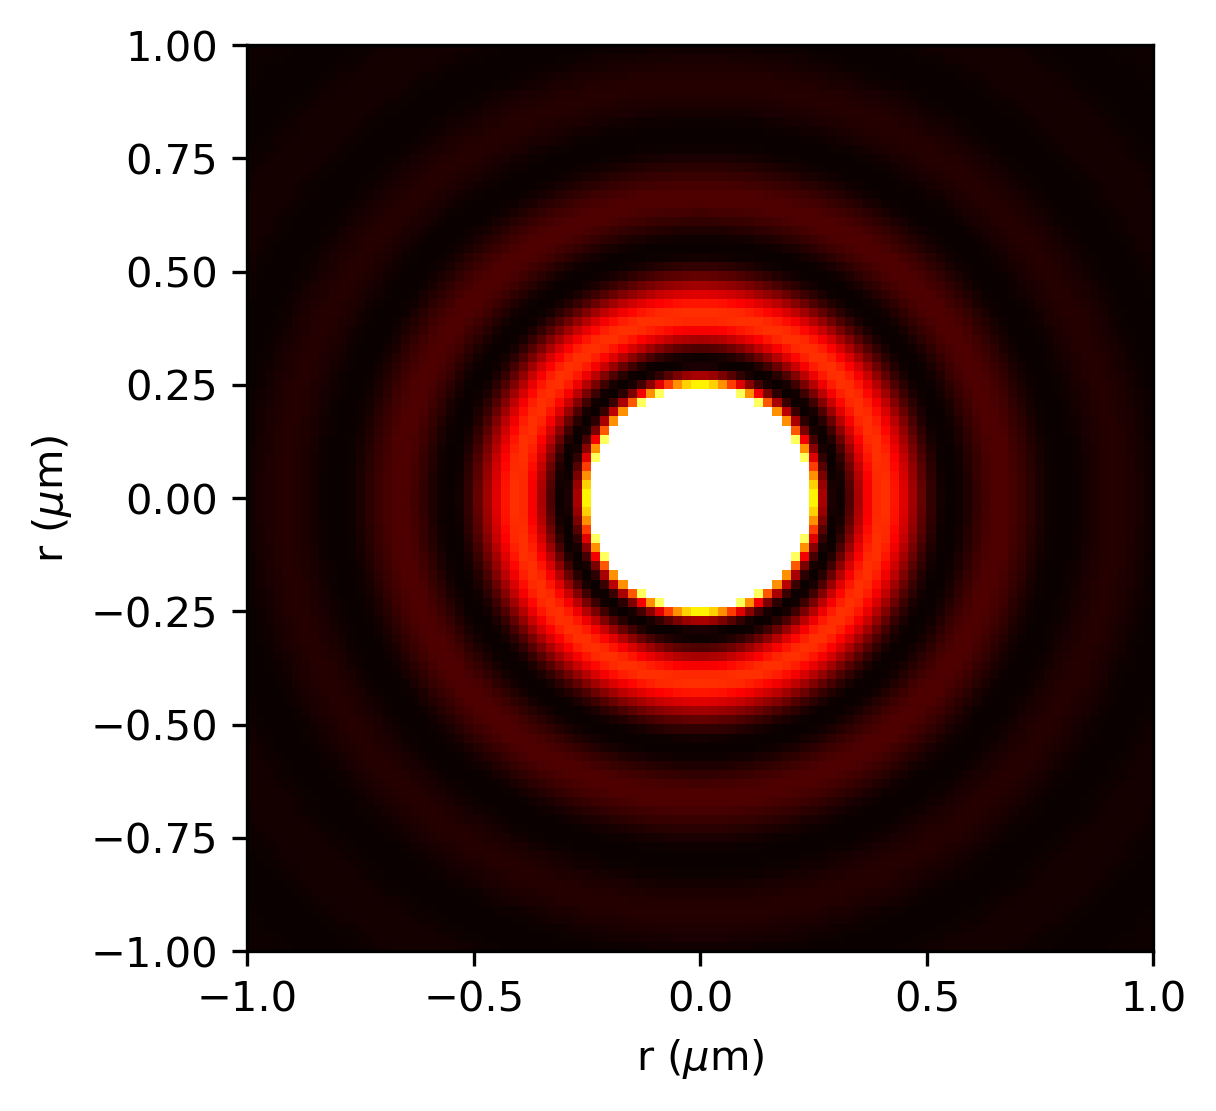

In [185]:
# Define parameters
lamba = 0.5
k = 2*np.pi/lamba
columns = 50
rows = 50

# Create the mapping grid
x,y = np.mgrid[-1:1:100j,-1:1:100j]

#make the coordinates circular
r = np.sqrt(x**2 + y**2)

#Create the image to plot
image = (J(1,k*r)/k/r)**2

#Plot image
plt.figure(1,dpi=300)
plt.imshow(image,cmap="hot",vmax = 0.01,extent=(-1,1,-1,1))
plt.xlabel("r ($\mu$m)")
plt.ylabel("r ($\mu$m)")
plt.show()

NameError: name 'np' is not defined

### Exercise 5.7: Romberg Integration

Take the integral:

$$I = \int_{0}^{1}sin^2\sqrt{100x} dx$$

a) Calculate the value of this integral using adaptive trapezoidal method to an approximate accuracy of $\epsilon = 10^{-6}$.  Print the number of slices, estimate of the integral, and the estimate of the error of integral (for each N) until threshold reached.  The adaptive trapezoidal rule and the equation for error is below

$$I_i = \frac{1}{2}I_{i-1} + h_i\sum_{k odd}f(a+kh_i)$$

$$\epsilon_i = \frac{1}{3}(I_i-I_{i-1})$$

b) Now use romberg integration.  Print a triangular table of values of all the Romberg estimates.  Calculate error on estimates and continue until $\epsilon$ is reached.

$$R_{i, m+1} = R_{i,m} + \frac{1}{4^m-1}\left(R_{i,m}-R_{i-1,m}\right)$$

with $R_{1,1} = I_1$ and $R_{2,1} = I_2$

and
$$ \epsilon = c_mh^{2m}_i = \frac{1}{4^m-1}\left(R_{i,m}-R_{i-1,m}\right) + O(h^{2m+2}_{i})$$

In [186]:
#Define function to integrate over
def F(x):
    return np.sin(np.sqrt(100*x))**2

#Create adpative trapezoidal function
def adapt_trap(f, a, b, thresh):
    """Uses the adaptive trapezoidal rule to calculate the integral of function f, with start point a, end point b, and an error threshold thresh.  Returns the value of the integral once the desired threshold is reached"""
    val = []
    N = 1
    h = (b-a)
    I1 = h*(0.5*F(a)+0.5*F(b))
    for j in range(1,N,N):
        I1 += h*F(a+j*h)
    val.append(I1)
    eps = 1
    for i in range(1,100):
        if eps >= thresh:
            N *= 2
            h = (b-a)/N
            I = 0.5*val[i-1]
            for k in range(1,N,2):
                I += h*F(a+k*h)
            val.append(I)
            eps = 1/3*abs(val[i]-val[i-1])
            print(f'The Integral estimate for N = {N} is {val[i]:4f} with error {eps:4.3}')
        else:
            print("***The threshold has been reached***")
            break


In [187]:
adapt_trap(F,0,1,1e-6)

The Integral estimate for N = 2 is 0.325232 with error 0.0591
The Integral estimate for N = 4 is 0.512283 with error 0.0624
The Integral estimate for N = 8 is 0.402997 with error 0.0364
The Integral estimate for N = 16 is 0.430103 with error 0.00904
The Integral estimate for N = 32 is 0.448415 with error 0.0061
The Integral estimate for N = 64 is 0.453913 with error 0.00183
The Integral estimate for N = 128 is 0.455349 with error 0.000479
The Integral estimate for N = 256 is 0.455711 with error 0.000121
The Integral estimate for N = 512 is 0.455802 with error 3.03e-05
The Integral estimate for N = 1024 is 0.455825 with error 7.58e-06
The Integral estimate for N = 2048 is 0.455831 with error 1.9e-06
The Integral estimate for N = 4096 is 0.455832 with error 4.74e-07
***The threshold has been reached***


In [188]:
## ROMBERG INTEGRATION

# define a function to do 2nd part of adapt trap rule
def newSum(F,N,a,b):
    h = (b-a)/N
    S = 0
    for k in range(1,N,2):
        S += h*F(a+k*h)
    return S
    
# define constants
a = 0
b = 1
val = []
N = 1
h = (b-a)
I0 = h*(0.5*F(a)+0.5*F(b))

#create an empty array for R values
R = np.empty((100,100))
eps = 1
i = 0
R[0,0] = I0

# iterate until desired error is reached
while eps > 1e-6:
    N *= 2
    i += 1
    I_past = R[i-1,0]
    I_new = I_past/2 + newSum(F,N,a,b)
    R[i,0] = I_new
    # create table to print R values, formatted to 7 digits
    table = []
    table.append(f"{R[i,0]:0.7f}")
    for m in range(i):
        R[i,m+1] =R[i,m] + 1/(4**(m+1)-1)*(R[i,m] - R[i-1,m])
        table.append(f"{R[i,m]:0.7f}")
    print(table)
    eps = abs(R[i,m+1]-R[i-1,m])

['0.3252319', '0.3252319']
['0.5122829', '0.5122829', '0.5746332']
['0.4029974', '0.4029974', '0.3665690', '0.3526980']
['0.4301034', '0.4301034', '0.4391387', '0.4439767', '0.4454255']
['0.4484147', '0.4484147', '0.4545184', '0.4555437', '0.4557274', '0.4557678']
['0.4539129', '0.4539129', '0.4557457', '0.4558275', '0.4558320', '0.4558324', '0.4558325']
['0.4553485', '0.4553485', '0.4558270', '0.4558325', '0.4558325', '0.4558325', '0.4558325', '0.4558325']


### Exercise 5.9: Heat Capacity

Heat Capacity of a solid at temperature T is given by:

$$C_V = 9V\rho k_B\left(\frac{T}{\theta_D}\right)^3 \int_{0}^{\theta_D/T}\frac{x^4e^x}{(e^x-1)^2}dx$$

Where $k_B$ is the Boltzmann Constant, $V$ is the volume of the solid, $\rho$ is the density of atoms, and $\theta_D$ is the Debye Temperature.

a) Write a function cv(T) that calculates $C_V$ for given T for a sample consisting of $V = 1000 cm^3$ , $\rho = 6.022\times 10^{28} m^{-3}$ and $\theta_D = 428 K$

Use Gaussian quadrature with N = 50

b) Make a graph of heat capacity as a function of temperature from T = 5 to T = 500 K

In [189]:
def cv(T):
    """Returns Debye heat capacity (float) for a specific input temperature T"""
    #Define Constants
    theta = 428
    a = 0
    b = theta/T
    p = 6.022e28
    V = 0.001
    kb = 1.38064852e-23
    # Define function to integrate over
    def func(x):
        return (x**4)*np.exp(x)/(np.exp(x)-1)**2
    points = np.polynomial.legendre.leggauss(50)
    points_adj = 1/2*(b-a)*points[0]+1/2*(b-a)
    weights = 1/2*(b-a)*points[0]
    #Define first part of the formula
    P1 = 9*V*p*kb*(T/theta)**3
    #Define integral part of formula
    P2 = np.sum(func(points_adj)*weights)
    #Multiply two parts together
    Cv = P1*P2
    return Cv

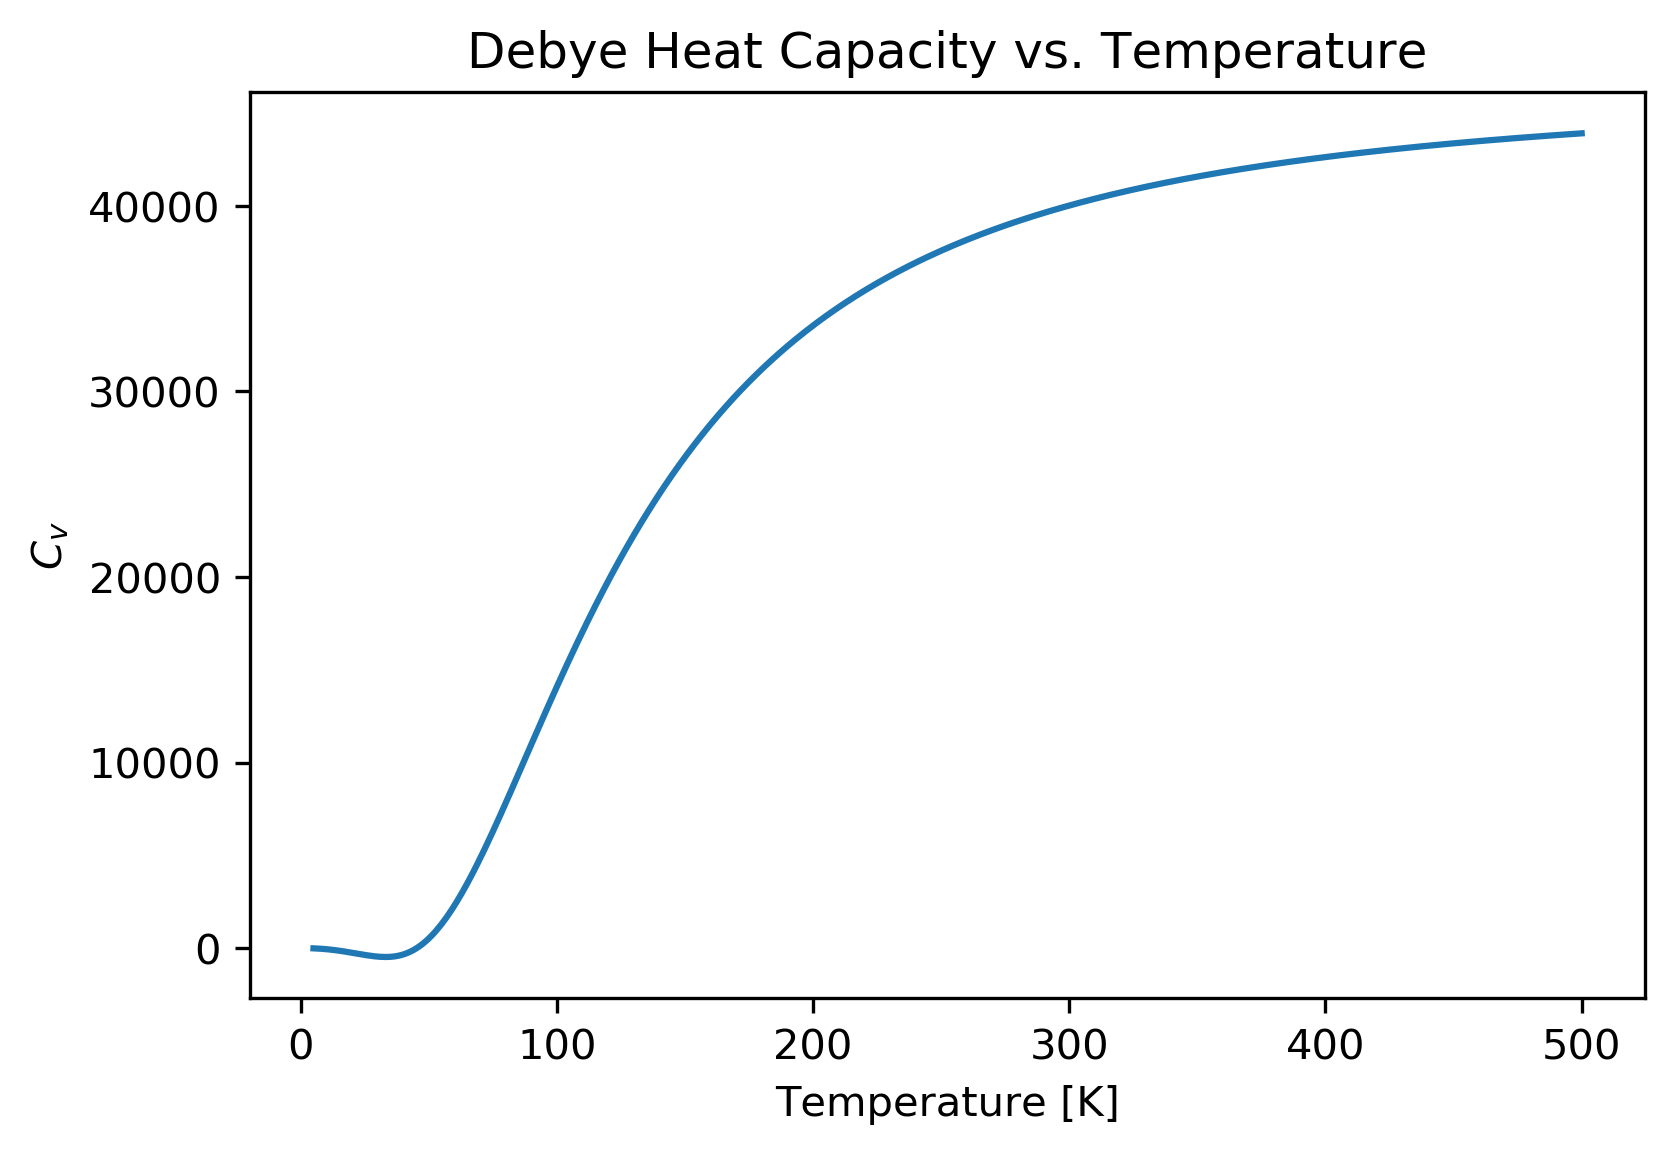

In [190]:
temp = np.arange(5,501,1)
heat = []
for i in temp:
    heat.append(cv(i))
    
plt.figure(1,dpi=300)
plt.plot(temp,heat)
plt.title("Debye Heat Capacity vs. Temperature")
plt.xlabel("Temperature [K]")
plt.ylabel("$C_v$")
plt.show()

### Exercise 5.10: Period of an Anharmonic Oscillator

a) We release an object from rest at a position x = a in an anharmonic oscillator. From the equation
$$E = \frac{1}{2}m\left(\frac{dx}{dt}\right)^2 + V(x)$$

the period T is given by:

$$T = \sqrt{8m}\int_{0}^{a}\frac{dx}{\sqrt{V(a)-V(x)}}$$

b) Take $V(x) = x^4$ and m = 1.  Write a function that calculates T for a given amplitude $a$ with Guassian Quad. with N = 20. Then graph period for amplitudes from a = 0 to a = 2

In [191]:
def V(x):
    return x**4

def T(a):
    """Returns the period for an oscillator with potential V at starting amplitude a"""
    m = 1
    b = 0
    points,weights = gaussxwab(20,b,a)
    T = np.sum(1/np.sqrt(V(a)-V(points))*weights)
    T *= np.sqrt(8*m)
    return T

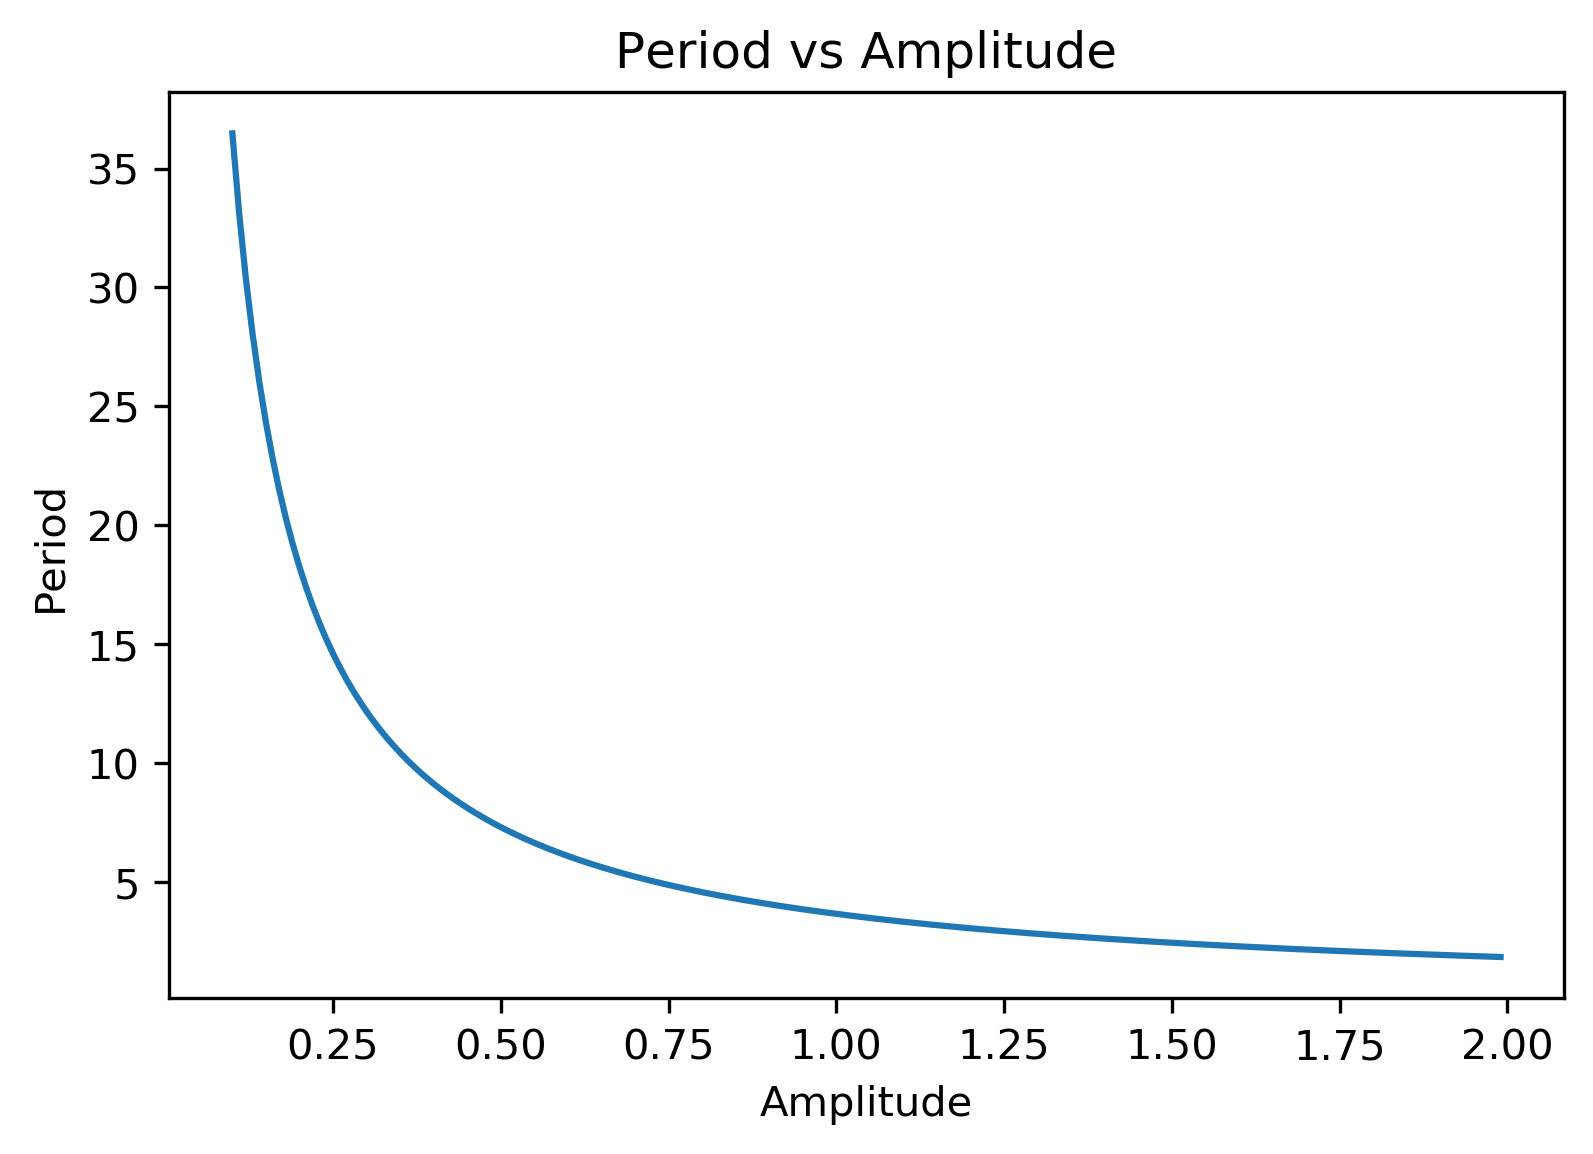

In [192]:
T_val = []
a_val = np.arange(0.1,2,0.01)
for i in a_val:
    T_val.append(T(i))
    
plt.figure(dpi=300)
plt.plot(a_val,T_val)
plt.title("Period vs Amplitude")
plt.xlabel("Amplitude")
plt.ylabel("Period")
plt.show()

### Exercise 5.11: Diffraction Around Edges

The intensity at a position (x,z) of a diffracted wave is given by:

$$I = \frac{I_0}{8}\left([2C_u+1]^2+[2S(u)+1]^2\right)$$

where
$u = x\sqrt{\frac{2}{\lambda z}}$, $C(u) = \int_{0}^{u}cos(\frac{1}{2}\pi t^2) dt$, and $S(u) = \int_{0}^{u}sin(\frac{1}{2}\pi t^2) dt$

Write a program to calculate $I/I_0$ and make a plot of it as a function of x from -5 to 5.  Take $\lambda = 1$ and $z = 3$.  Use gaussian quad. with N = 50.

Rearranging $C(u)$ and $S(u)$ we can get the integral with respect to x for z = 3 and $\lambda = 1$.  For these numbers we get $u = x\sqrt{2/3}$
Therefore,

$$C(x) = \int_{0}^{x\sqrt{2/3}}cos(\frac{1}{3}\pi x^2) dx$$

and 

$$S(x) = \int_{0}^{x\sqrt{2/3}}sin(\frac{1}{3}\pi x^2) dx$$

In [193]:
def func3(x):
    return np.cos(1/3*np.pi*x**2)
def func4(x):
    return np.sin(1/3*np.pi*x**2)

def I1(x):
    """returns the value of the Intensity at position x."""
    a = 0
    b = x*np.sqrt(2/3)
    
    # Generate Gaussian quadrature points/weights
    points,weights = gaussxwab(50,a,b)
    
    C = np.sum(func3(points)*weights)
    S = np.sum(func4(points)*weights)
    I = (2*C+1)**2 + (2*S+1)**2
    I *= 1/8
    return I

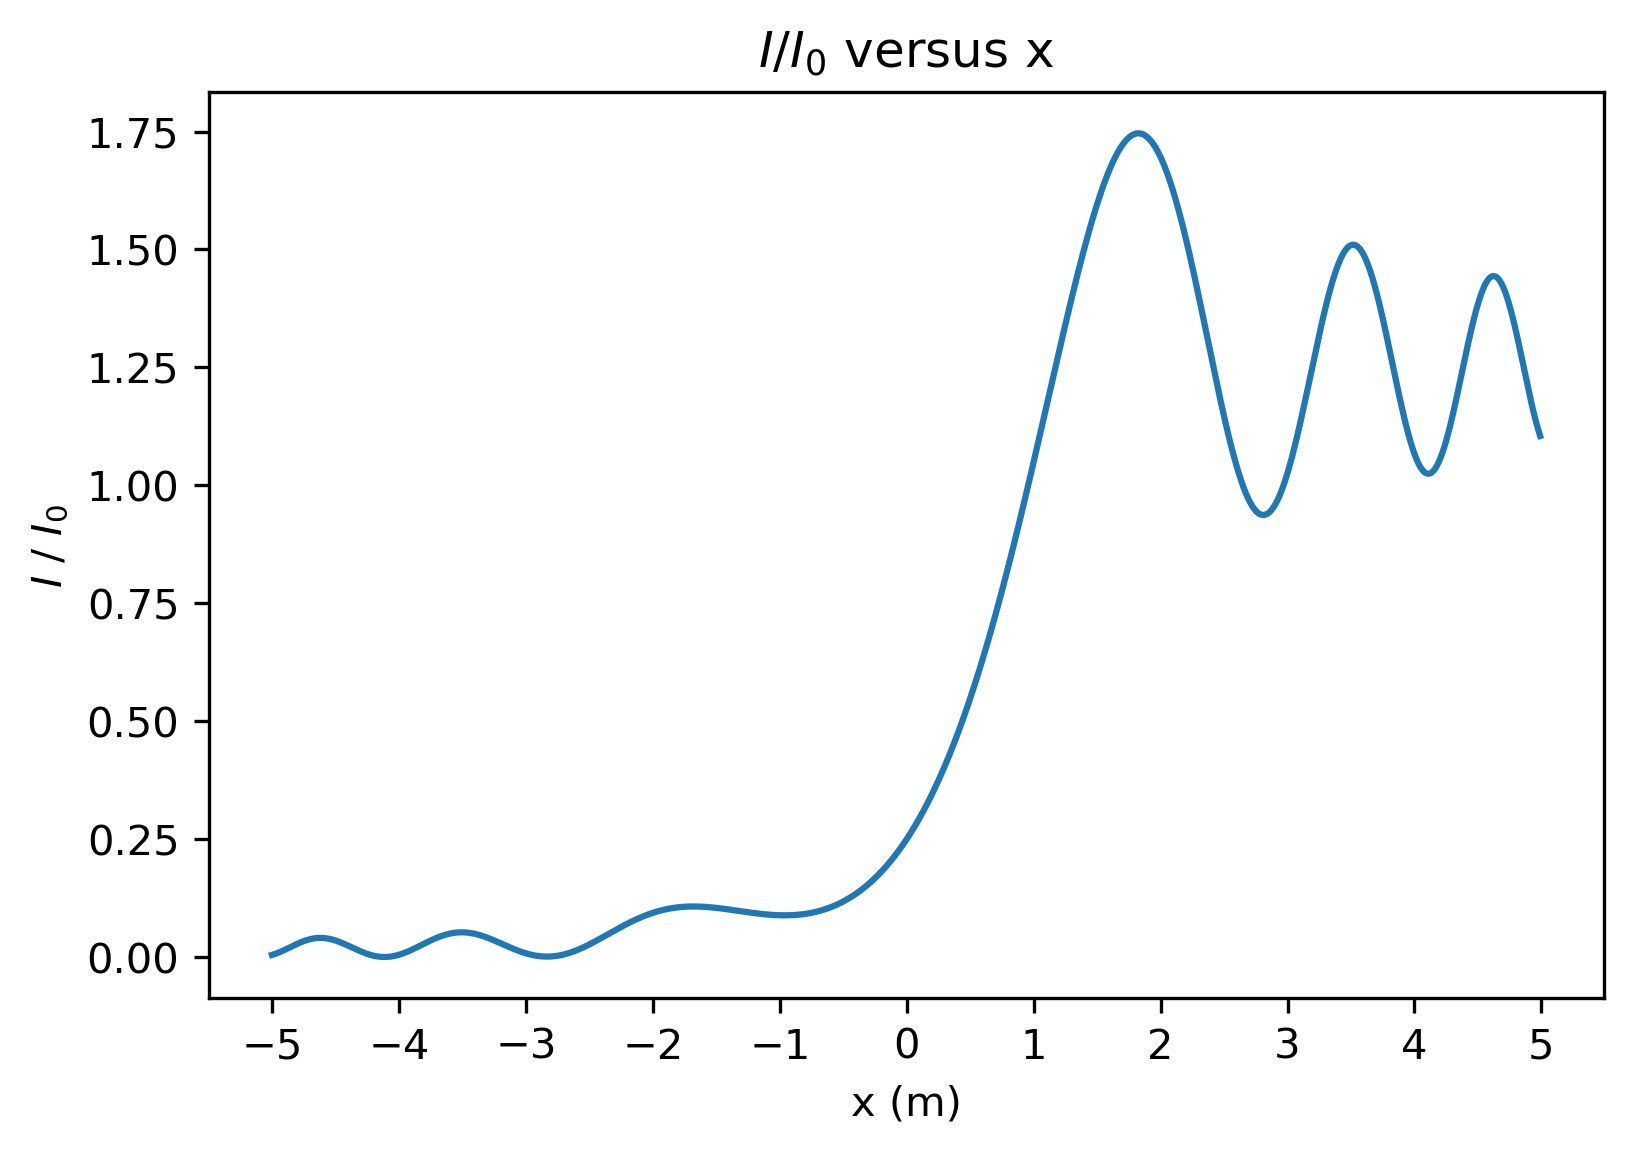

In [194]:
x = np.arange(-5,5,0.01)
Ival = []
for i in x:
    Ival.append(I1(i))
    
plt.figure(dpi=300)
plt.plot(x,Ival)
plt.xticks(np.arange(-5,6,1))
plt.title("$I/I_0$ versus x")
plt.xlabel("x (m)")
plt.ylabel("$I$ / $I_0$")
plt.show()

### Exercise 5.12: Stefan Boltzmann Constant 

The amount of thermal energy radiated by a black body per second is equal to $I(\omega)d\omega$ where:

$$I(\omega) = \frac{\hbar}{4\pi^2c^2}\frac{\omega^3}{e^{\hbar\omega/k_BT}} -1$$

a) Show that the total rate at which energy is radiated by a black body per unit area is:

$$W = \frac{k_B^4T^4}{4\pi^2c^2\hbar^3}\int_{0}^{\infty}\frac{x^3}{e^x-1}dx$$

b) Write a program to evaluate the integral in the expression.  To do this we must use a change of variables:
$z = \frac{x}{1+x}$ or $x = \frac{z}{1-z}$ and $dx = dz/(1-z)^2$

to which the integral becomes:

$$\int_{0}^{\infty}\frac{x^3}{e^x-1}dx = \int_{0}^{1}\frac{1}{(1-z)^2}\frac{\left(\frac{z}{1-z}\right)^3}{e^{z/(1-z)}-1}dz$$
$$ = \int_{0}^{1}\frac{z^3}{(1-z)^5}\frac{1}{e^{z/(1-z)}-1}dz$$

c) Given $W = \sigma T^4$ solve for $\sigma$ which is the Stefan Boltzmann constant and compare to the actual answer of:
$$\sigma = 5.670374419 \times 10^{-8}$$

In [204]:
## Define constants:
kb = 1.380649e-23
c = 2.998e8
hbar = 1.054571817e-34

def func5(z):
    return z**3/(1-z)**5/(np.exp(z/(1-z))-1)

#Define Start/end points
a = 0
b = 1

#Generate Gaussian Quadrature points/weights
points, weights = gaussxwab(50,0,1)
Int = 0.0

#Define constant
cons = kb**4/4/np.pi**2/c**2/hbar**3

# Sum over all points/weights
for k in range(50):
    Int += weights[k]*func5(points[k])
Int *= cons

#Print answer
print(f"The calculated value of the Stefan Boltzmann is {Int:4.5}")
print(f"The accuracy is within {abs(Int-5.670374419e-8)/5.670374419e-8*100:.3f} %")

The calculated value of the Stefan Boltzmann is 5.6701e-08
The accuracy is within 0.005 %


### Exercise 5.13: Quantum Uncertainty

The wave function for a spinless particle in a quadratic potential well is given by:

$$\psi_n(x) = \frac{1}{\sqrt{2^nn!\sqrt{\pi}}}e^{-x^2/2}H_n(x)$$

where

$$H_{n+1}(x) = 2xH_n(x)-2nH_{n-1}(x)$$

and $H_0(x) = 1$ and $H_1(x) = 2x$

a) Write a function H(n,x) that calculates the hermite polynomial for given x and any n >= 0.  Then plot the wavefunctions for n = 0,1,2,3 from x = -4 to x = 4

b) Make another plot for the wavefunction for n = 30 from x = -10 to x = 10

c) The quantum uncertainty is given by the RMS position $\sqrt{<x^2>}$ where

$$<x^2> = \int_{-\infty}^{\infty}x^2|\psi_n(x)|^2dx$$

Write a program that evaluates this integral using Gauss Quad with N = 1, then calculates the uncertainity. Test it for n = 5.

To integrate from $-\infty$ to $\infty$ we make the following substitutions $x = tan(z)$ and $dx = \frac{dz}{cos^2(z)}$  This yields:

$$\int_{-\infty}^{\infty}x^2|\psi_n(x)|^2dx = \int_{-\pi/2}^{pi/2}\frac{tan^2(z)}{cos^2(z)}|\psi_n(tan(z))|^2$$

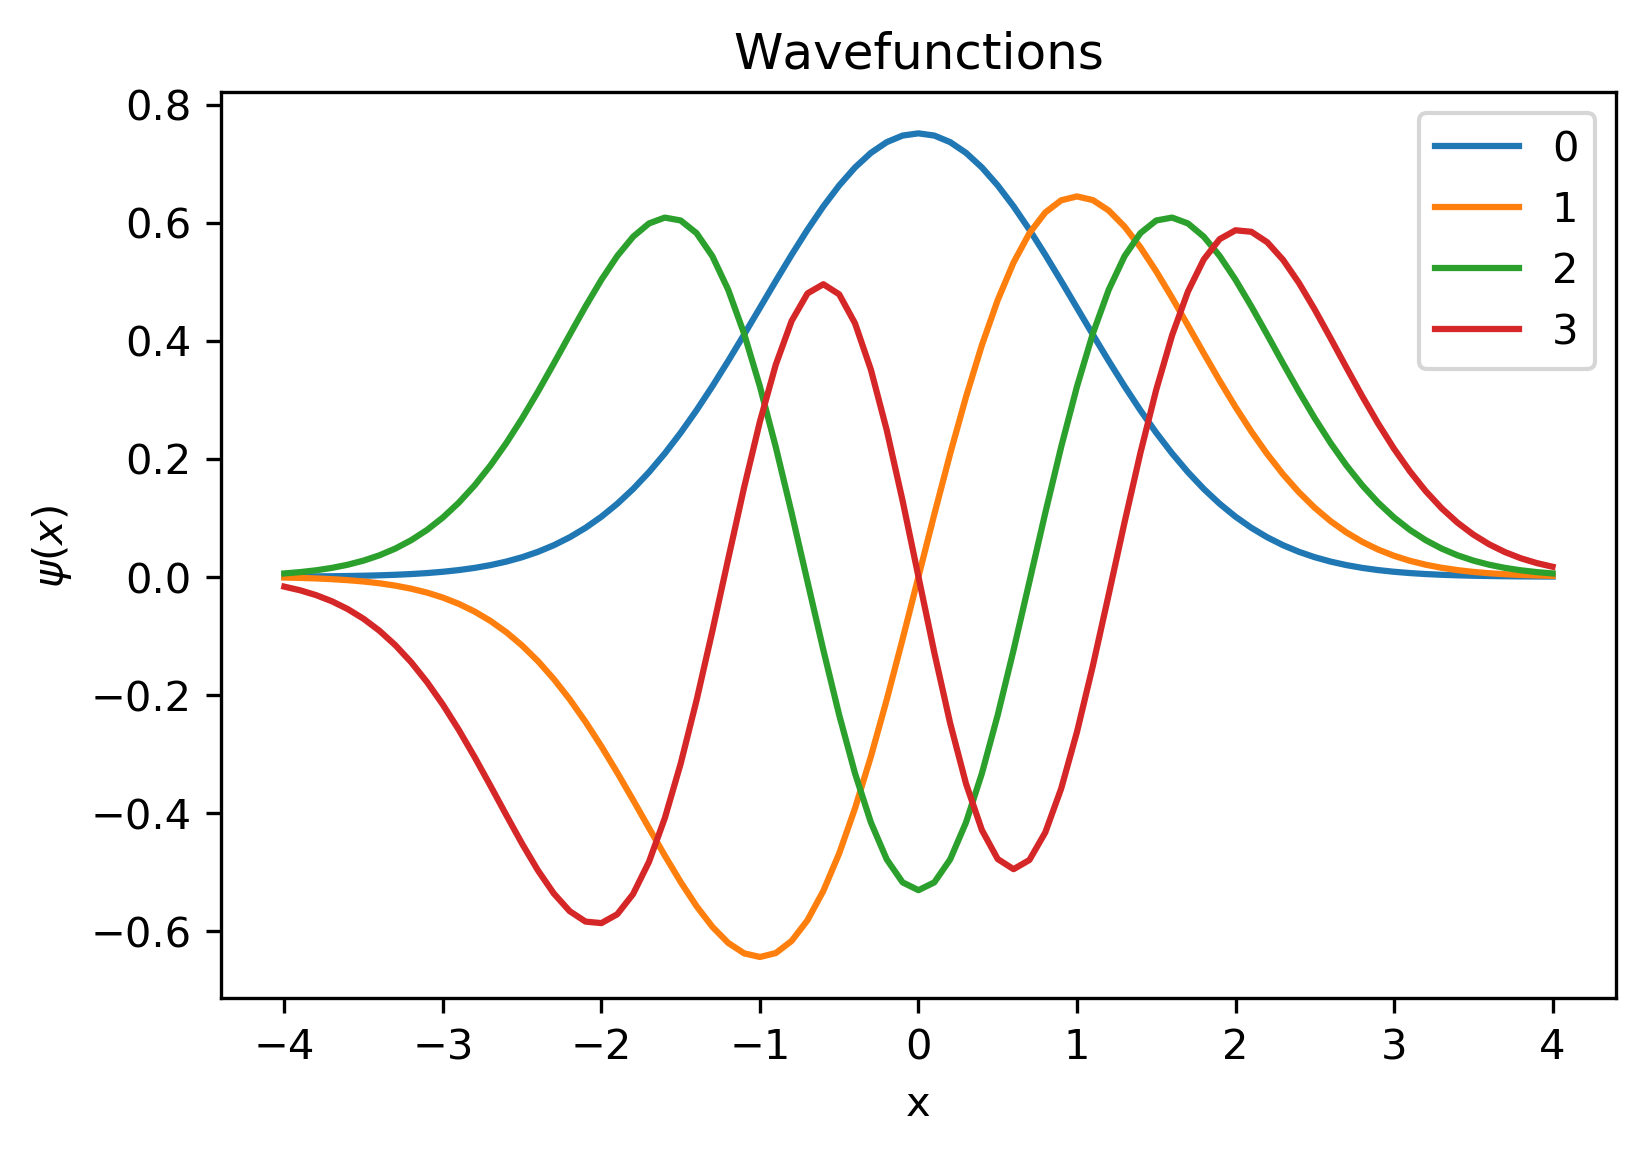

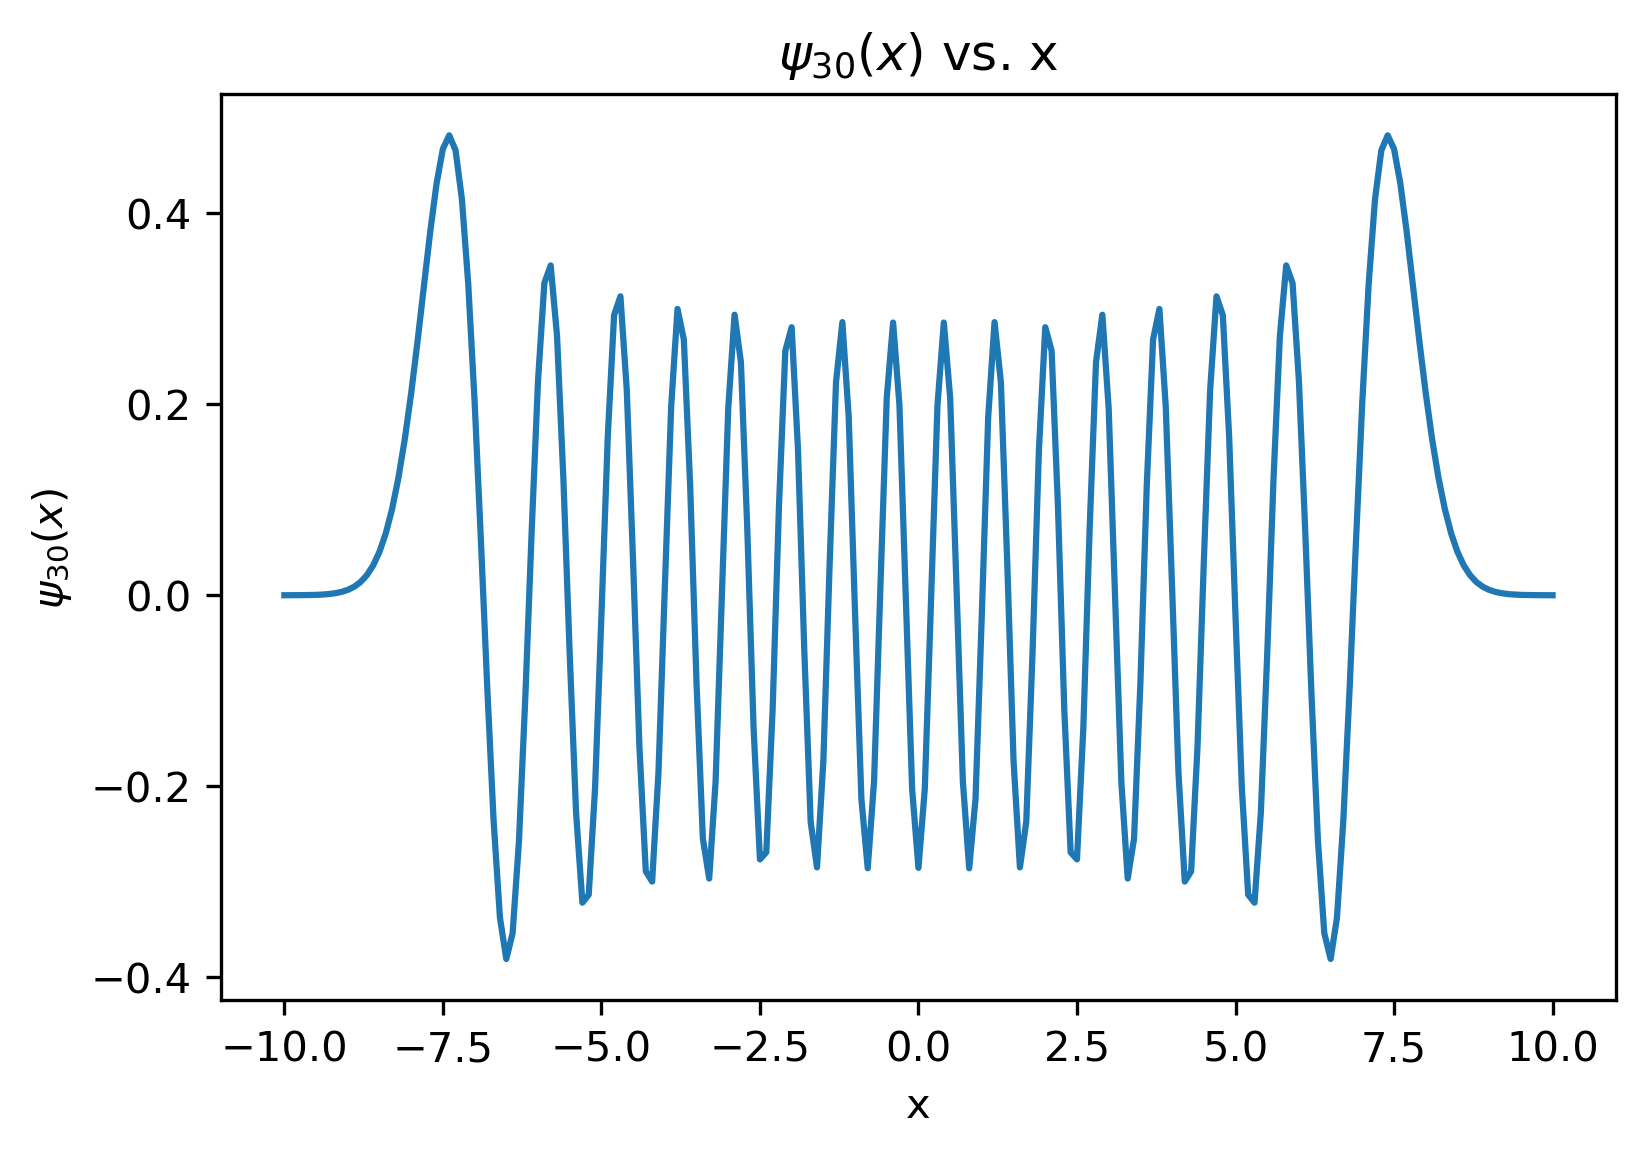

In [196]:
def H(n,x):
    """Returns the hermite polynomial of degree n for an input value x"""
   # Define first two H functions
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    
    # if n > 1 use loop to return new H function
    else:
        H = [1,2*x]
        num = 1
        for i in range(2,n+1):
            Hnew = 2*x*H[1]-2*num*H[0]
            Hold = H[1]
            H = [Hold,Hnew]
            num += 1
            
    return H[1]

def psi(n,x):
    """Returns the wavefunction n for values of x"""
    p1 = 1/np.sqrt(2**n*np.math.factorial(n)*np.sqrt(np.pi))
    p2 = np.exp(-x**2/2)*H(n,x)
    return p1*p2


Psi = []
step = 0.1
x = np.arange(-4,4+step,step)
plt.figure(dpi=300)

#Plot each wavefunction as a function of x and label
for j in range(4):
    Psi.append(psi(j,x))
    plt.plot(x,Psi[j], label = j)
plt.title("Wavefunctions")
plt.xlabel("x")
plt.ylabel("$\psi (x)$")
plt.legend()
plt.show()

# Make plot for Psi when N = 30 from x=-10 to x=10
x = np.arange(-10,10+step,step)
plt.figure(dpi=300)
plt.title("$\psi_{30}(x)$ vs. x")
plt.ylabel("$\psi_{30}(x)$")
plt.xlabel("x")
plt.plot(x,psi(30,x))
plt.show()

In [197]:
def func7(n, x):
    return x**2*abs(psi(n,x))**2

def RMS(n):
    """Returns the RMS uncertaintity for func7 for a specific wavefunction n as a float"""
    points, weights = gaussxwab(100,-np.pi/2,np.pi/2)
    I =  func7(n,np.tan(points))/np.cos(points)**2
    I *= weights
    return np.sqrt(sum(I))

print(f'The uncertainty for n = 5 is {RMS(5):0.4f}')

The uncertainty for n = 5 is 2.3452


### 5.19: Diffraction Gratings

The intensity of the diffraction pattern on the screen at a distance x away from the central axis is given by:
$$I(x) = |\int_{-w/2}^{w/2}\sqrt{q(u)}e^{i2\pi xu\lambda f} du|^2$$

Where $q(u)$ is the intensity transmission function of the diffraction grating at a distance u from the central axis.

a) Consider $q(u) = sin^2 \alpha u$  What is the slit separation expressed in terms of $\alpha$

b) Write a function q(u) that returns the transmission function $q(u) = sin^2 \alpha u$ at position u with $\alpha = \pi / 20 \mu m$

c) Use the function to calculate and graph the intensity pattern for a grating with 10 slits and $\lambda = 500 nm$ with a focal length $f = 1 m$ and a 10 cm wide screen.  

**For this we will use simpson integration, as guassian quadrature would require too many points.  We will choose simpson integration because the integrand is highly oscillatory.  We will also choose 500 slices to make the program run for about 1 second**

#### Part a:

Since the function we are dealing with is $sin^2(\alpha u)$ we know that the period of a function $sin^2(u)$ has a period of $/pi$.  Therefore, if we were to multiply the argument by $\alpha$ then the period would become $pi/\alpha$.  In our case, the period of the function is equivalent to the slit separation and is equal to $pi/\alpha$

In [198]:
def simp_rule(f, N, a, b):
    "Performs simpson integration for function f, number of slices N, starting point a, and ending point b.  N must be an integer.  Returns the value of the integral as a float."
    # Define constants
    h = (b-a)/N
    s1 = complex(0)
    s2 = complex(0)
    # loop through the first sum
    for i in range(1,N//2+1):
        s1 += f(a+(2*i-1)*h)
    s1 *= 4 
    #Loop through the second sum
    for j in range(1,N//2):
        s2 += f(a+2*j*h)
    s2 *= 2
    # return the sum of both sums, plus the function values at
    # the start and end point
    return h/3*(f(a)+f(b)+s1+s2)

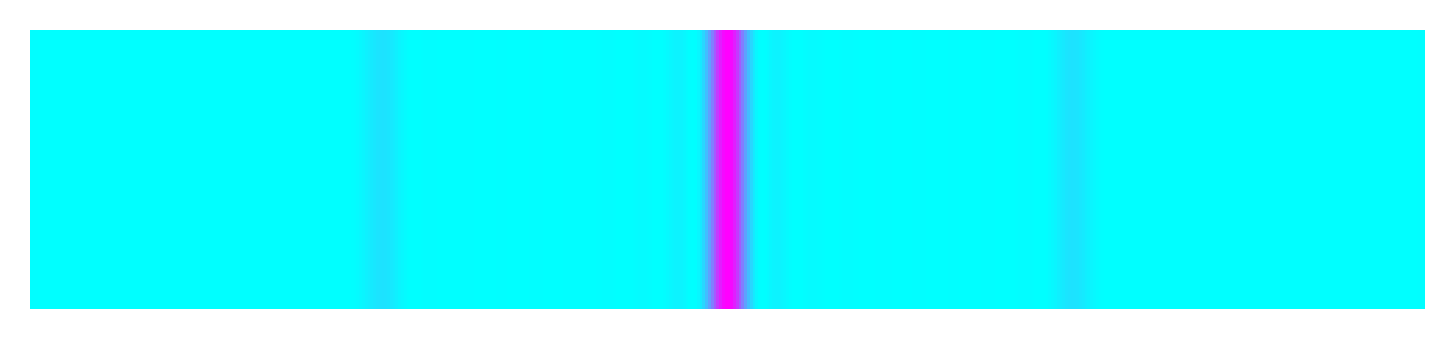

In [199]:
f = 1 # in m
lmbda = 500e-9 # in m
sep = 20e-6 # in m
w = sep*10 # in m
samples = 500
screen_width = 0.1 # in m

def q(u):
    alph = np.pi/sep
    return np.sin(alph*u)**2

x = np.linspace(-screen_width/2,screen_width/2, samples)

def func8(u):
    return np.sqrt(q(u))*cmath.exp(1j*2*np.pi*i*u/lmbda/f)

def I2(x):
    I0 = simp_rule(func8,500,-w/2,w/2)
    return abs(I0)**2

Ivals = []
for i in x:
    Ivals.append(I2(i))

# Create empty grid to assign intensity values to
map = np.empty([100,samples],float)

# Assign intensity values
for k in range(100):
    map[k,:] = Ivals

# Plot
plt.figure(dpi=300)
plt.imshow(map, cmap = 'cool')
plt.axis("off")
plt.show()

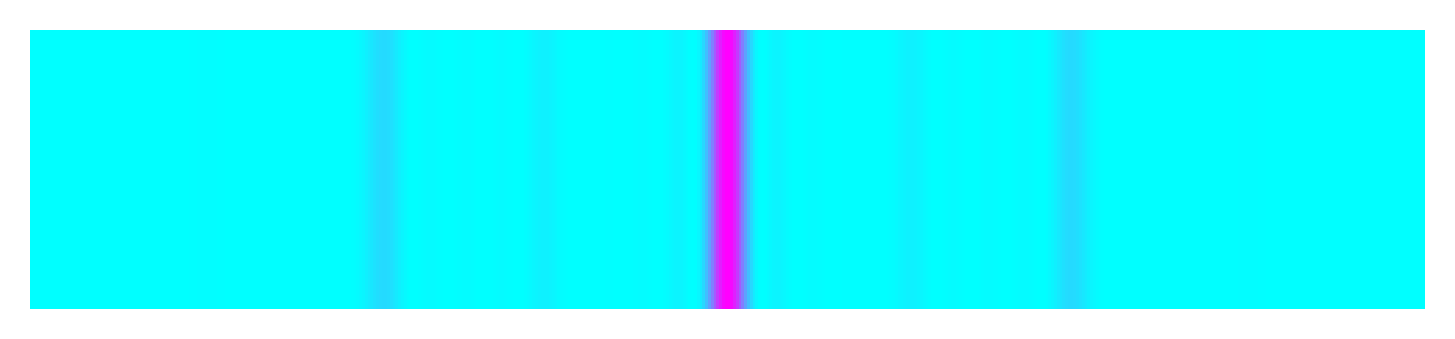

In [200]:
## Redefine trasmission function and plot again

def q(u):
    alpha = np.pi/sep
    beta = 1/2*alpha
    return np.sin(alpha*u)**2*np.sin(beta*u)**2

x = np.linspace(-screen_width/2,screen_width/2, samples)

def func8(u):
    return np.sqrt(q(u))*cmath.exp(1j*2*np.pi*i*u/lmbda/f)

def I(x):
    I0 = simp_rule(func8,500,-w/2,w/2)
    return abs(I0)**2
Ivals = []
for i in x:
    Ivals.append(I(i))

map = np.empty([100,samples],float)

for k in range(100):
    map[k,:] = Ivals

plt.figure(dpi=300)
plt.imshow(map, cmap='cool')
plt.axis("off")
plt.show()

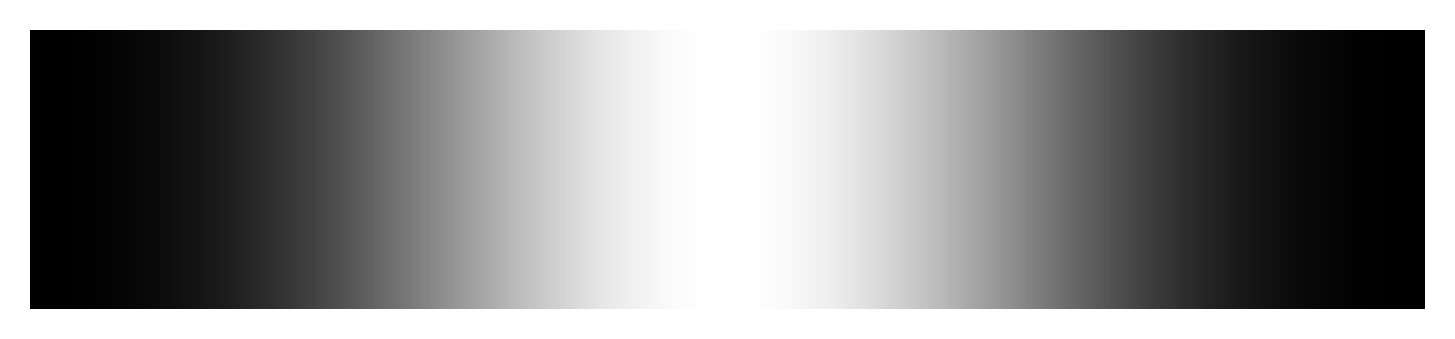

In [201]:
## Modify to two square slits
f = 1 # in m
lmbda = 500e-9 # in m
sep = 60e-6 # in m
w1 = 10e-6
w2 = 20e-6
w = sep+w1+w2 # in m
samples = 500
screen_width = 0.1 # in m


def q(u):
    # Central axis is at u = 0, first slit is from u = -45 um to -35 um
    # Second slit is from u = 70 um to u = 90 um
    if u < -35e-6:
        return 1
    elif u > 70e-6:
        return 1
    else:
        return 0

x = np.linspace(-screen_width/2,screen_width/2, samples)

def func8(u):
    return np.sqrt(q(u))*cmath.exp(1j*2*np.pi*i*u/lmbda/f)

def I(x):
    I0 = simp_rule(func8,500,-w/2,w/2)
    return abs(I0)**2
Ivals = []
for i in x:
    Ivals.append(I(i))

map = np.empty([100,samples],float)

for k in range(100):
    map[k,:] = Ivals
    
plt.figure(dpi=300)
plt.imshow(map, cmap = 'gray')
plt.axis("off")
plt.show()